<a href="https://colab.research.google.com/github/braunito/2022_FB-Sprint-Jump/blob/main/nlz_sprint_jump_squat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#================================================================
# Funktionen & Pakete laden
#================================================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
from scipy.signal.signaltools import filtfilt
from scipy.signal.filter_design import butter


In [72]:
# Laden der Datendatei
data=pd.read_csv('/content/drive/MyDrive/data/2022-02_nlz_sprint_jump_squat/Daten_NLZ.csv', sep=";",encoding='utf8') # Funktion zum Laden einer csv-Datei. Die Spalten sind durch Tabulatoren getrennt, die ersten vier Reihen werden ignoriert.


In [73]:
data.head()

,Probandennummer,NLZ,Sportart,Leistungsniveau,Geschlecht,Alter zum Testzeitpkt,Gewicht,Größe,Squat Jump,Countermovement Jump,1RM Kniebeuge hinten,Linearsprint 10m,Linearsprint 20m,Linearsprint 30 m,Relativkraftleistung
0,1,1,Fußball,Nachwuchsleistungszentrum,männlich,19,79.6,184.5,39.1,38.8,110.0,1.713,2.956,4.128,1.38
1,2,1,Fußball,Nachwuchsleistungszentrum,männlich,19,68.6,171.0,41.9,41.9,100.0,1.706,2.909,4.077,1.46
2,3,1,Fußball,Nachwuchsleistungszentrum,männlich,19,63.1,172.0,35.5,37.9,90.0,1.766,3.006,4.176,1.43
3,5,1,Fußball,Nachwuchsleistungszentrum,männlich,18,78.1,179.0,37.7,42.1,80.0,1.758,3.000,4.152,1.02
4,6,1,Fußball,Nachwuchsleistungszentrum,männlich,18,79.2,183.0,35.6,36.4,80.0,1.784,3.095,4.342,1.01


In [5]:
!pip install kneed

import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [74]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)



In [75]:
features=data.loc[:,['Squat Jump', 'Relativkraftleistung','Linearsprint 10m','Countermovement Jump']]
features_clean=clean_dataset(features)
len(features_clean)

463

In [76]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_clean)
scaled_features[:5]

array([[ 0.56357657,  0.54935947, -0.67178771,  0.11824529],
       [ 1.06700155,  0.82840876, -0.75720746,  0.67053122],
       [-0.08368411,  0.72376528, -0.02503819, -0.04209579],
       [ 0.31186408, -0.70636237, -0.12266076,  0.70616258],
       [-0.06570465, -0.74124353,  0.1946126 , -0.30933091]])

In [79]:
kmeans = KMeans(
init="random",
n_clusters=4,
n_init=10,
max_iter=300,
random_state=42
)

kmeans.fit(scaled_features)

kmeans.n_iter_
clust=kmeans.labels_
features_clustered=features
features_clustered['cluster']=clust
features_clustered.head()

,Squat Jump,Relativkraftleistung,Linearsprint 10m,Countermovement Jump,cluster
0,39.1,1.38,1.713,38.8,1
1,41.9,1.46,1.706,41.9,3
2,35.5,1.43,1.766,37.9,1
3,37.7,1.02,1.758,42.1,1
4,35.6,1.01,1.784,36.4,2


In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
  
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(scaled_features)
   sse.append(kmeans.inertia_)




In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


kl = KneeLocator(
   range(1, 11), sse, curve="convex", direction="decreasing"
   )

print('Number of clusters: ', kl.elbow)

NameError: ignored

In [ ]:
kl = KneeLocator(
   range(1, 11), sse, curve="convex", direction="decreasing"
   )

print('Number of clusters: ', kl.elbow)

Number of clusters:  3


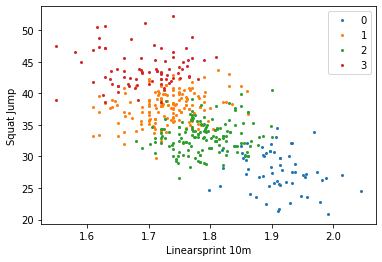

In [80]:
groups = features_clustered.groupby('cluster')
for name, group in groups:
    plt.plot(group['Linearsprint 10m'], group['Squat Jump'],marker='o', linestyle='', markersize=2, label=name)
    plt.xlabel('Linearsprint 10m')
    plt.ylabel('Squat Jump')
plt.legend()

#plt.plot(features_clustered['Linearsprint 10m'],features_clustered['Countermovement Jump'], label=features_clustered['cluster'], c=features_clustered['cluster'],marker='.', linestyle='none')

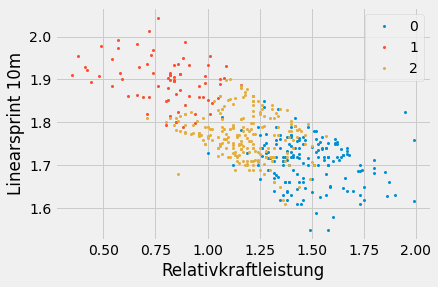

In [ ]:
groups = features_clustered.groupby('cluster')
for name, group in groups:
    plt.plot(group['Relativkraftleistung'],group['Linearsprint 10m'],marker='o', linestyle='', markersize=2, label=name)
    plt.ylabel('Linearsprint 10m')
    plt.xlabel('Relativkraftleistung')
plt.legend()


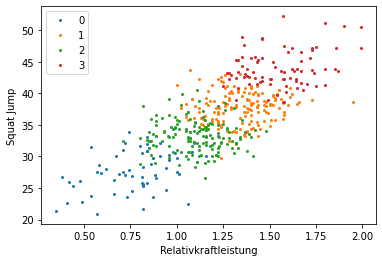

In [81]:
groups = features_clustered.groupby('cluster')
for name, group in groups:
    plt.plot(group['Relativkraftleistung'],group['Squat Jump'],marker='o', linestyle='', markersize=2, label=name)
    plt.ylabel('Squat Jump')
    plt.xlabel('Relativkraftleistung')
plt.legend()

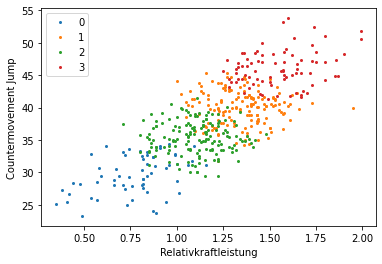

In [82]:
groups = features_clustered.groupby('cluster')
for name, group in groups:
    plt.plot(group['Relativkraftleistung'],group['Countermovement Jump'],marker='o', linestyle='', markersize=2, label=name)
    plt.ylabel('Countermovement Jump')
    plt.xlabel('Relativkraftleistung')
plt.legend()

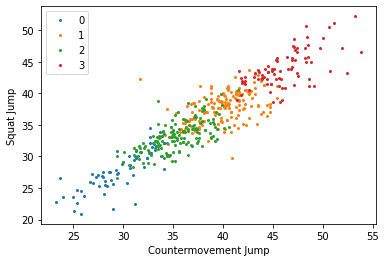

In [83]:
groups = features_clustered.groupby('cluster')
for name, group in groups:
    plt.plot(group['Countermovement Jump'],group['Squat Jump'],marker='o', linestyle='', markersize=2, label=name)
    plt.ylabel('Squat Jump')
    plt.xlabel('Countermovement Jump')
plt.legend()

[65.          1.29506154  0.91521591  4.52026136]


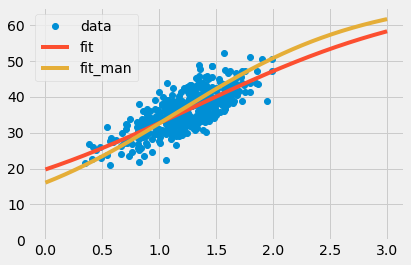

In [ ]:
from scipy.optimize import curve_fit

xdata=features_clean['Relativkraftleistung']
ydata=features_clean['Squat Jump']

def sigmoid(x, L , x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)



p0 = [65, 1,22,10] # this is an mandatory initial guess
#p0 = [max(ydata), 1,22,min(ydata)] # this is an mandatory initial guess

#p0 = [max(ydata[:]), np.median(xdata),1,min(ydata[:])]
#p0 = [70, 1,0,0] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0,bounds=([0., 65.]),method='dogbox')

x = np.linspace(0, 3, 1000)
y = sigmoid(x, *popt)
y_man = 65 / (1 + np.exp(-1.2*(x-1.15))) +3
#y_man = 65 / (1 + np.exp(-0.9*(x-1.7))) +10

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x,y, label='fit')
plt.plot(x,y_man,label='fit_man')
plt.ylim(0, 65)
plt.legend(loc='best')
print(popt)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

model = LogisticRegression(max_iter=10000, n_jobs=-1) # one ...
# fit the curve
model.fit(xdata, ydata) # two. That's it!


ValueError: ignored

In [54]:
features_clustered['Countermovement Jump'].round(decimals=1)

df_desc=features_clustered.groupby(['cluster']).describe().loc[:,(slice(None),['mean','std'])].applymap('{:,.2f}'.format)
print(df_desc)

with open('mytable.tex','w') as tf:
    tf.write(df_desc.to_latex())

        Squat Jump       Relativkraftleistung  ... Linearsprint 10m Countermovement Jump      
              mean   std                 mean  ...              std                 mean   std
cluster                                        ...                                            
0            41.53  3.30                 1.48  ...             0.06                43.70  3.32
1            28.23  3.18                 0.80  ...             0.05                30.24  3.06
2            34.39  2.65                 1.17  ...             0.05                36.61  2.78

[3 rows x 8 columns]


In [56]:
! pip install tableone
from tableone import TableOne, load_dataset


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [84]:
groupby = ['cluster']
#nonnormal = ['Age']
#labels={'death': 'mortality'}
#categorical = ['ICU', 'death']
#columns = ['Age', 'SysABP', 'Height', 'Weight', 'ICU', 'death']

#mytable = TableOne(data, columns=columns, categorical=categorical, groupby=groupby, nonnormal=nonnormal, rename=labels, pval=False)

mytable = TableOne(features_clustered, groupby=groupby,pval=True,missing=False)
print(mytable.tabulate(tablefmt = "fancy_grid"))

mytable.to_excel('mytable.xlsx')    #LaTeX, CSV, and HTML
mytable.to_latex('mytable2.tex')    #LaTeX, CSV, and HTML



╒═════════════════════════════════╤════╤════════════╤════════════╤════════════╤════════════╤════════════╤═══════════╕
│                                 │    │ Overall    │ 0          │ 1          │ 2          │ 3          │ P-Value   │
╞═════════════════════════════════╪════╪════════════╪════════════╪════════════╪════════════╪════════════╪═══════════╡
│ n                               │    │ 463        │ 62         │ 162        │ 157        │ 82         │           │
├─────────────────────────────────┼────┼────────────┼────────────┼────────────┼────────────┼────────────┼───────────┤
│ Squat Jump, mean (SD)           │    │ 36.0 (5.6) │ 27.7 (3.2) │ 37.8 (2.5) │ 33.2 (2.5) │ 43.9 (2.9) │ <0.001    │
├─────────────────────────────────┼────┼────────────┼────────────┼────────────┼────────────┼────────────┼───────────┤
│ Relativkraftleistung, mean (SD) │    │ 1.2 (0.3)  │ 0.8 (0.2)  │ 1.3 (0.2)  │ 1.1 (0.2)  │ 1.5 (0.2)  │ <0.001    │
├─────────────────────────────────┼────┼────────────┼───